## Final Project. Data Analysis in Python: House Sales in King County, USA

This project is developed as a Final Project for the course Data Analysis with Python on Coursera (link to the course: https://www.coursera.org/learn/data-analysis-with-python) 

__Dataset Used in this Project__

The dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from  here https://www.kaggle.com/datasets/harlfoxem/housesalesprediction. It was also slightly modified for the purposes of this final project by the course moderators.


| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


#### Importing necessary libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Module 1: Importing Data Sets

In [20]:
url = r'C:\Users\user\Downloads\kc_house_data_NaN.csv'
df = pd.read_csv(url)

In [24]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Displaying the data types of each column using the function dtypes.

In [27]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Using the method describe to obtain a statistical summary of the dataframe.

In [32]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Using the method shape to obtain the information about the number of columns and rows.

In [34]:
df.shape

(21613, 22)

### Module 2: Data Wrangling

Dropping the columns "id” and "Unnamed: 0" from axis 1 using the method drop(), then using the method describe() to obtain a statistical summary of the data. 

In [40]:
df.drop('id', axis =1, inplace=True)
df.drop('Unnamed: 0', axis = 1, inplace =True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see that we have missing values for the columns "bedrooms" and "bathrooms". 

In [43]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


Replacing the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). 

In [46]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Replacing the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace(). 

In [49]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [51]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Module 3: Exploratory Data Analysis

Using the method value_counts to count the number of houses with unique floor values, using the method .to_frame() to convert it to a data frame.

In [55]:
df['floors'].value_counts().to_frame()

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Using the function boxplot in the seaborn library  to  determine whether houses with a waterfront view or without a waterfront view have more price outliers.

<Axes: xlabel='waterfront', ylabel='price'>

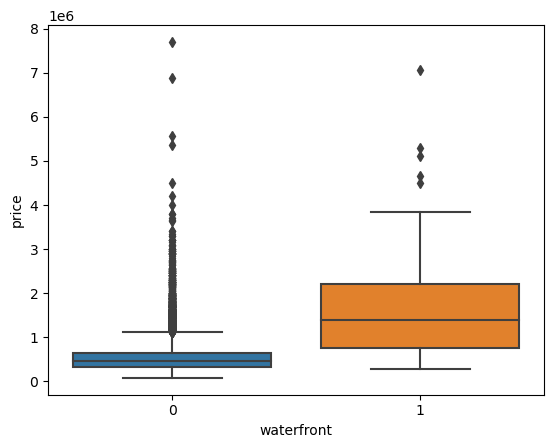

In [59]:
sns.boxplot(x='waterfront', y= 'price', data =df)

The boxplot shows that the houses without a waterfront have more price outliers. 

Using the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. 

(0.0, 8081250.0)

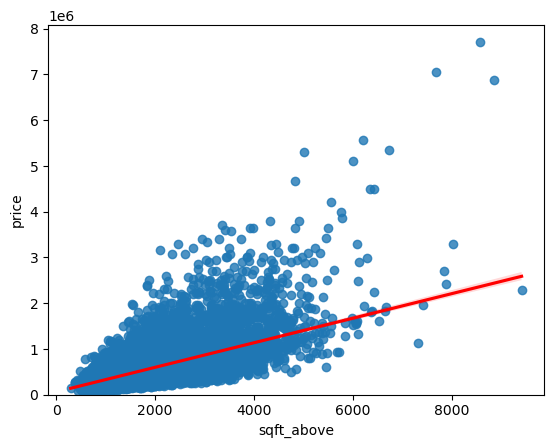

In [63]:
sns.regplot(x='sqft_above', y = 'price', data =df, line_kws={"color": "red"})
plt.ylim(0,)

Regression plot shows that the sqft_above is positively correlated with price.

Using the Pandas method corr() to find the feature other than price that is most correlated with price.

In [79]:
df['date'] = pd.to_datetime(df['date'])
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
zipcode         -0.053203
Name: price, dtype: float64

The results show that the most correlated with price is "sqft_living".

### Module 4: Model Development

Fiting a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2.

In [86]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X,Y))

0.4928532179037931


Since R^2 values range from 0 to 1, a score of 0.4928 indicates a moderate positive correlation.

Fitting a linear regression model to predict the 'price' using the list of features:

In [90]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

Calculating R^2

In [96]:
Z = df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.6576951666037502


By including additional features, the model is now able to account for more of the factors that influence price. This leads to a better fit between the model and the actual data, reflected in the higher R^2 score.

Creating a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [100]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False))
       ,('model',LinearRegression())]

Using the list to create a pipeline object to predict the 'price', fitting the object using the features in the list features, and calculating the R^2.

In [105]:
from sklearn.metrics import r2_score

In [107]:
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.7513404101380663


The R^2 score of 0.7513404101380663 indicates that approximately 75.13% of the variance in the target variable (the price of houses) can be explained by the linear regression model. It suggests that the model is a good fit for the data and can be used to make reasonably accurate predictions of house prices based on the given features.

### Module 5: Model Evaluation and Refinement

Importing the necessary modules:

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Splitting the data into training and testing sets:

In [129]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Creating and fitting a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculating the R^2 using the test data. 

In [120]:
from sklearn.linear_model import Ridge

In [131]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6478759163939112


The R^2 score of 0.6479 in this case indicates a moderate positive correlation between the predicted house prices and the actual prices in the test set using a Ridge Regression model.

Performing a second order polynomial transform on both the training data and testing data. Creating and fitting a Ridge regression object usinging the training data, setting the regularisation parameter to 0.1, and calculating the R^2 utilising the test data provided. 

In [137]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7002744259992868


The R^2 score of 0.7003 suggests a moderate to strong positive correlation between the predicted house prices and the actual prices in the test set using Ridge Regression with polynomial features. This is an improvement compared to the previous Ridge Regression model.